## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape(( len( x_train ), -1 ) )
x_test = x_test.reshape(( len( x_test ), -1 ) )

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical( y_train, num_classes = 10 )
y_test = keras.utils.to_categorical( y_test, num_classes = 10 )

### 建立模型

In [4]:
def build_mlp( ) : 
  input_layer = keras.layers.Input( [ x_train.shape[-1] ] )
  hidden_1 = keras.layers.Dense( units = 512, activation = "relu" )( input_layer )
  hidden_2 = keras.layers.Dense( units = 256, activation = "relu" )( hidden_1 )
  hidden_3 = keras.layers.Dense( units = 128, activation = "relu" )( hidden_2 )
  output_layer = keras.layers.Dense( units = 10, activation = "softmax" )( hidden_3 )
    
  model = keras.models.Model( inputs = [ input_layer ], outputs = [ output_layer ] )

  return model

model = build_mlp( )
model.summary()

W0713 07:19:22.761432 140681765246848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 07:19:22.800893 140681765246848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 07:19:22.810990 140681765246848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


###  Adam 演算法 

In [5]:
Adam = keras.optimizers.Adam( lr = 0.001 )

model.compile( optimizer = Adam, 
               loss = "categorical_crossentropy", 
               metrics=["accuracy"] 
               )

W0713 07:19:22.916831 140681765246848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 07:19:22.929910 140681765246848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
"""
設定要訓練的 Epoch 數
"""
epochs = 500

model.fit( x_train, y_train, 
           epochs = epochs, 
           batch_size = 256, 
           validation_data = ( x_test, y_test ),  # 以 Test Set 作為 Validation Set 觀察
           shuffle = True,
           verbose = 2
           )

W0713 07:19:23.084124 140681765246848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 07:19:23.153635 140681765246848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
 - 13s - loss: 1.9517 - acc: 0.2982 - val_loss: 1.7574 - val_acc: 0.3755
Epoch 2/500
 - 12s - loss: 1.7061 - acc: 0.3873 - val_loss: 1.6362 - val_acc: 0.4120
Epoch 3/500
 - 12s - loss: 1.6125 - acc: 0.4221 - val_loss: 1.6361 - val_acc: 0.4135
Epoch 4/500
 - 12s - loss: 1.5572 - acc: 0.4440 - val_loss: 1.5468 - val_acc: 0.4457
Epoch 5/500
 - 12s - loss: 1.5020 - acc: 0.4644 - val_loss: 1.4934 - val_acc: 0.4628
Epoch 6/500
 - 12s - loss: 1.4701 - acc: 0.4760 - val_loss: 1.5953 - val_acc: 0.4352
Epoch 7/500
 - 12s - loss: 1.4443 - acc: 0.4860 - val_loss: 1.5038 - val_acc: 0.4653
Epoch 8/500
 - 12s - loss: 1.4095 - acc: 0.4974 - val_loss: 1.4533 - val_acc: 0.4780
Epoch 9/500
 - 13s - loss: 1.3878 - acc: 0.5061 - val_loss: 1.4455 - val_acc: 0.4807
Epoch 10/500
 - 12s - loss: 1.3506 - acc: 0.5191 - val_loss: 1.4287 - val_acc: 0.4899
Epoch 11/500
 - 12s - loss: 1.3306 - acc: 0.5271 - val_loss: 1.4512 - val_acc: 0.4885
Epoch 12/500


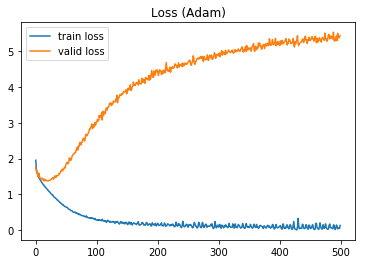

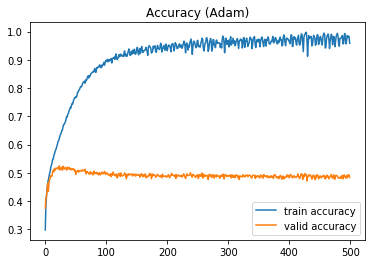

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history[ "loss" ]
valid_loss = model.history.history[ "val_loss" ]

train_acc = model.history.history[ "acc" ]
valid_acc = model.history.history[ "val_acc" ]

plt.plot( range(len(train_loss)), train_loss, label = "train loss" )
plt.plot( range(len(valid_loss)), valid_loss, label = "valid loss" )
plt.legend( )
plt.title( "Loss (Adam)" )
plt.show( )

plt.plot( range(len(train_acc)), train_acc, label = "train accuracy" )
plt.plot( range(len(valid_acc)), valid_acc, label = "valid accuracy" )
plt.legend( )
plt.title( "Accuracy (Adam)" )
plt.show( )

### SGD 演算法

In [0]:
SGD = keras.optimizers.SGD( lr = 0.001 )

model.compile( optimizer = SGD, 
               loss = "categorical_crossentropy", 
               metrics=["accuracy"] 
               )

In [9]:
model.fit( x_train, y_train, 
           epochs = epochs, 
           batch_size = 256, 
           validation_data = ( x_test, y_test ),  # 以 Test Set 作為 Validation Set 觀察
           shuffle = True,
           verbose = 2
           )

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
 - 11s - loss: 0.1209 - acc: 0.9618 - val_loss: 5.3531 - val_acc: 0.4882
Epoch 2/500
 - 10s - loss: 0.0574 - acc: 0.9813 - val_loss: 5.3387 - val_acc: 0.4898
Epoch 3/500
 - 10s - loss: 0.0378 - acc: 0.9880 - val_loss: 5.3330 - val_acc: 0.4901
Epoch 4/500
 - 10s - loss: 0.0285 - acc: 0.9913 - val_loss: 5.3334 - val_acc: 0.4906
Epoch 5/500
 - 10s - loss: 0.0230 - acc: 0.9933 - val_loss: 5.3321 - val_acc: 0.4916
Epoch 6/500
 - 10s - loss: 0.0194 - acc: 0.9945 - val_loss: 5.3326 - val_acc: 0.4905
Epoch 7/500
 - 11s - loss: 0.0169 - acc: 0.9955 - val_loss: 5.3329 - val_acc: 0.4920
Epoch 8/500
 - 10s - loss: 0.0149 - acc: 0.9963 - val_loss: 5.3335 - val_acc: 0.4918
Epoch 9/500
 - 10s - loss: 0.0135 - acc: 0.9968 - val_loss: 5.3347 - val_acc: 0.4918
Epoch 10/500
 - 10s - loss: 0.0123 - acc: 0.9974 - val_loss: 5.3355 - val_acc: 0.4916
Epoch 11/500
 - 10s - loss: 0.0114 - acc: 0.9976 - val_loss: 5.3360 - val_acc: 0.4923
Epoch 12/500


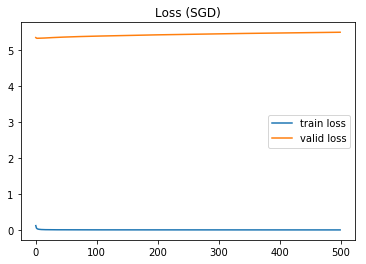

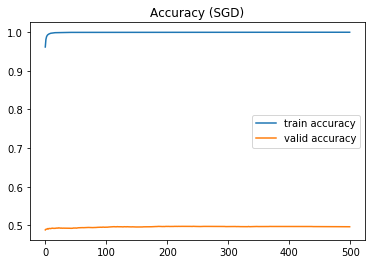

In [10]:
train_loss = model.history.history[ "loss" ]
valid_loss = model.history.history[ "val_loss" ]

train_acc = model.history.history[ "acc" ]
valid_acc = model.history.history[ "val_acc" ]

plt.plot( range(len(train_loss)), train_loss, label = "train loss" )
plt.plot( range(len(valid_loss)), valid_loss, label = "valid loss" )
plt.legend( )
plt.title( "Loss (SGD)" )
plt.show( )

plt.plot( range(len(train_acc)), train_acc, label = "train accuracy" )
plt.plot( range(len(valid_acc)), valid_acc, label = "valid accuracy" )
plt.legend( )
plt.title( "Accuracy (SGD)" )
plt.show( )